# [EXPLORATION-02]
# Digits Dataset Classification

손글씨 이미지를 0~9까지 열 가지 카테고리로 분류하는 모델을 만들고 평가한다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# 1. 데이터 준비
* load_digits() 함수로 digits데이터를 불러온다.
* digits data는 1797행 64열 형식으로 구성
* target name은 0부터 9까지로 구성됨

In [ ]:
# digits dataset 불러오기
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
print(digits.data.shape) # 데이터 개수 확인
print(digits.target.shape) # target 데이터 개수 확인

(1797, 64)
(1797,)


In [ ]:
digits.target_names # 데이터 target name 확인

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits.feature_names # 데이터 feature name 확인

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

# 각 클래스별 데이터 개수 및 편향(bias)확인
* 데이터가 편향(bias)되었는지 확인
* 데이터의 클래스별 개수를 셈하기 위해 defaultdict를 사용하여 계산
* 현재 0부터 9까지 클래스별 데이터는 편향되지 않음으로 판단.
* 이후 train_test_split()으로 데이터 추출시 자동으로 랜덤하게 할당

In [ ]:
from collections import defaultdict

digits_dict = defaultdict(int)
for i in digits.target:
    digits_dict[i] += 1 # 키에 대한 값이 없으면 값을 0으로 초기화

digits_dict

defaultdict(int,
            {0: 178,
             1: 182,
             2: 177,
             3: 183,
             4: 181,
             5: 182,
             6: 181,
             7: 179,
             8: 174,
             9: 180})

# 2. train, test 데이터셋 분리

In [ ]:
# train, test 데이터 분리
digits_train_input, digits_test_input, digits_train_target, digits_test_target = train_test_split(digits.data, digits.target, test_size=0.2, random_state=7)

print(f"train_input shape: {digits_train_input.shape}")
print(f"train_target shape: {digits_train_target.shape}")
print(f"test_input shape: {digits_test_input.shape}")
print(f"test_target shape: {digits_test_target.shape}")

train_input shape: (1437, 64)
train_target shape: (1437,)
test_input shape: (360, 64)
test_target shape: (360,)


# 3. 모델 학습 및 예측
# 분류기 지정 
* 의사결정트리와 랜덤포레스트는 데이터의 입력값에 robust 하다
* SVM, 로지스틱회귀, 확률적경사하강은 input data의 scale에 robust 하지않다. 표준화를 하고나서 진행
* Pipeline 클래스는 연속된 변환을 순차적으로 처리할 수 있는 기능을 제공하는 유용한 래퍼(Wrapper) 도구

In [ ]:
digits_dt = DecisionTreeClassifier(random_state=32)                               # DecisionTree
digits_rf = RandomForestClassifier(random_state=32)                               # RandomForest
digits_svm = make_pipeline(StandardScaler(), svm.SVC(random_state=32))            # SVM
digits_sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=32))      # SGDClassifier
digits_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=32))  # LogisticRegression

# 훈련 및 테스트 함수 생성
* Digits dataset에 대해 훈련 및 테스트를 수행
* classification report및 confusion matrix 출력

In [ ]:
def train_test_result(classifier):
    classifier.fit(digits_train_input, digits_train_target)
    digits_pred = classifier.predict(digits_test_input)

    print(classification_report(digits_test_target, digits_pred))

    ax = sns.heatmap(confusion_matrix(digits_test_target, digits_pred), annot=True, cbar=False, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# 3.1 Decision Tree
* 전체 정확도는 0.86
---
* precision의 평균은 0.86이며, 0, 5, 7, 8은 precision이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 예측을 0, 5, 7, 8로 한 대상 중에 예측과 실제 값이 0, 5, 7, 8로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.86이며, 0, 3, 4, 5, 6은 recall이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 실제 값이 0, 3, 4, 5, 6인 대상 중에 예측과 실제 값이 0, 3, 4, 5, 6로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.86이며, 0, 4, 5, 6, 7은 f1-score가 평균값보다 높으므로 좋은 수치를 보임
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 4, 5, 6, 7이 상대적으로 높은 값을 보임
---
### 즉, Decision Tree의 정확도는 0.86이며, f1-score결과로 1, 2, 3, 8, 9의 경우 상대적으로 잘 못 맞춰 클래스별 편차가 발생하므로 **Decision Tree는 해당 dataset에 좋은 성능을 내지 못한다고 판단.**


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



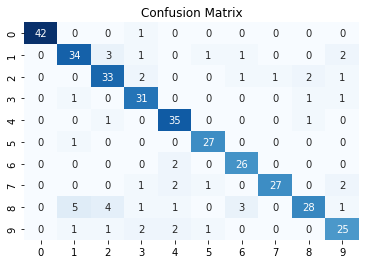

In [ ]:
train_test_result(digits_dt)

# 3.2 Random Forest
* 전체 정확도는 0.96
---
* precision의 평균은 0.96이며, 0, 2, 3, 6, 8은 precision이 평균값보다 높으므로 좋은 수치를 보임. 그렇다고 해서 나머지 precision이 나쁘다라고 할 수는 없음.
* 즉 예측을 0, 2, 3, 6, 8로 한 대상 중에 예측과 실제 값이 0, 2, 3, 6, 8로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.96이며,8을 제외한 나머지의 recall이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 실제 값이 0, 1, 2, 3, 4, 5, 6, 7, 9인 대상 중에 예측과 실제 값이 0, 1, 2, 3, 4, 5, 6, 7, 9로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.96이며, 5, 8를 제외한 나머지의 f1-score가 평균값보다 높으므로 좋은 수치를 보임
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 1, 2, 3, 4, 6, 7, 9가 상대적으로 높은 값을 보임
---
### 즉, Decision Tree의 정확도는 0.96이며, f1-score결과로 5, 8의 경우 상대적으로 잘 못맞춘다 판단되지만, 5의 경우 support횟수가 다른 클래스에 비에 표본이 적기 때문에 수치가 낮은것으로 보임. **즉, 상대적으로 8을 제외한 나머지는 잘 맞추므로 Random Forest는 해당 dataset에 좋은 성능을 낸다고 판단.**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



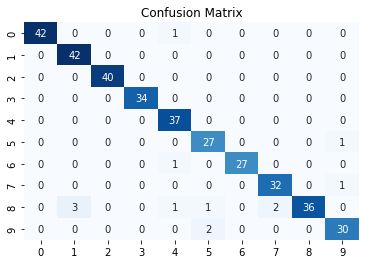

In [ ]:
train_test_result(digits_rf)

# 3.3 SVM
* 전체 정확도는 0.99
---
* precision의 평균은 0.99이며, 1, 5를 제외한 나머지는 precision이 평균값보다 높으므로 좋은 수치를 보임. 그렇다고 해서 나머지 precision이 나쁘다라고 할 수는 없음.
* 즉 예측을0, 2, 3, 4, 6, 7, 8, 9로 한 대상 중에 예측과 실제 값이 0, 2, 3, 4, 6, 7, 8, 9로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.99이며, 8, 9를 제외한 나머지의 recall이 평균값보다 높으므로 좋은 수치를 보임. 그렇다고 해서 나머지 recall이 나쁘다라고 할 수는 없음.
* 즉 실제 값이 0, 1, 2, 3, 4, 5, 6, 7인 대상 중에 예측과 실제 값이 0, 1, 2, 3, 4, 5, 6, 7로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.99이며, 5, 9를 제외한 나머지의 f1-score가 평균값보다 높으므로 좋은 수치를 보임. 그렇다고 해서 나머지 f1-score가 나쁘다라고 할 수는 없음.
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 1, 2, 3, 4, 6, 7, 8이 상대적으로 높은 값을 보임
---
### 즉, SVM의 정확도는 0.99이며, f1-score결과로 5, 9의 경우 상대적으로 잘 못맞춘다 판단되지만, 5와 9의 경우 support횟수가 다른 클래스에 비에 표본이 적기 때문에 수치가 낮은것으로 보임. **즉, 전체적으로 잘 맞추므로 SVM는 해당 dataset에 좋은 성능을 낸다고 판단.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.98      0.99        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



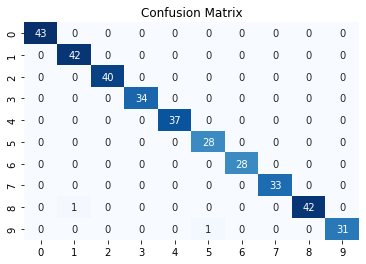

In [ ]:
train_test_result(digits_svm)

# 3.4 SGD Classifier
* 전체 정확도는 0.93
---
* precision의 평균은 0.93이며, 0, 2, 4, 5, 6, 7은 precision이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 예측을 0, 2, 4, 5, 6, 7로 한 대상 중에 예측과 실제 값이 0, 2, 4, 5, 6, 7로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.93이며 0, 2, 4, 5, 6, 7, 8은 recall이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 실제 값이 0, 2, 4, 5, 6, 7, 8인 대상 중에 예측과 실제 값이 0, 2, 4, 5, 6, 7, 8로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.93이며, 0, 2, 4, 5, 6, 7은 f1-score가 평균값보다 높으므로 좋은 수치를 보임
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 2, 4, 5, 6, 7가 상대적으로 높은 값을 보임
---
### 즉, SGD의 정확도는 0.93이며, f1-score결과로 1, 3, 8, 9의 경우 상대적으로 잘 못 맞춰 클래스별 편차가 발생하므로 **SGD는 해당 dataset에 좋은 성능을 내지 못한다고 판단.**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.92      0.86      0.89        42
           2       0.97      0.97      0.97        40
           3       0.89      0.91      0.90        34
           4       1.00      0.95      0.97        37
           5       0.93      0.93      0.93        28
           6       0.96      0.96      0.96        28
           7       0.94      0.97      0.96        33
           8       0.84      0.95      0.89        43
           9       0.87      0.81      0.84        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



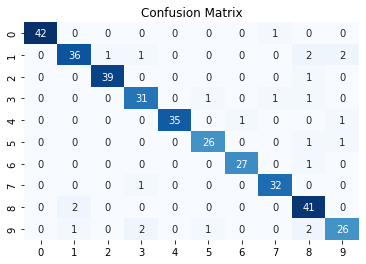

In [ ]:
train_test_result(digits_sgd)

# 3.5 Logistic Regression
* 전체 정확도는 0.96
---
* precision의 평균은 0.96이며, 0, 2, 3, 4, 6, 7은 precision이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 예측을 0, 2, 3, 4, 6, 7로 한 대상 중에 예측과 실제 값이 0, 2, 3, 4, 6, 7로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.96이며, 0, 2, 3, 4, 5, 7은 recall이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 실제 값이 0, 2, 3, 4, 5, 7인 대상 중에 예측과 실제 값이 0, 2, 3, 4, 5, 7로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.96이며, 0, 2, 3, 4, 6, 7의 f1-score가 평균값보다 높으므로 좋은 수치를 보임
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 2, 3, 4, 6, 7가 상대적으로 높은 값을 보임
---
### 즉, Logistic Regression의 정확도는 0.96이며, f1-score결과로 1, 5, 8, 9의 경우 상대적으로 잘 못 맞추지만 그렇다고 성능이 좋지 않다라고 판단할 수 없음.**즉, 전체적으로 잘 맞추므로 Logistic Regression는 해당 dataset에 좋은 성능을 낸다고 판단.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.93      0.93        42
           2       0.98      1.00      0.99        40
           3       0.97      1.00      0.99        34
           4       1.00      0.97      0.99        37
           5       0.88      1.00      0.93        28
           6       1.00      0.93      0.96        28
           7       1.00      1.00      1.00        33
           8       0.95      0.88      0.92        43
           9       0.91      0.91      0.91        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



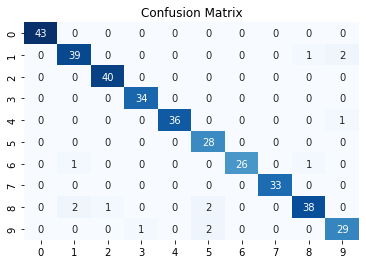

In [ ]:
train_test_result(digits_lr)

# 4. 성능평가 및 결론

# 성능평가
#### 가장 높은 score를 얻은 모델은 다음과 같다.
* accuracy  : (SVM, 0.99)
* precision : (SVM, 0.99)
* recall   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; : (SVM, 0.99)
* f1-score &nbsp; : (SVM, 0.99)

# 결론
#### 손글씨는 손으로 쓴 숫자가 무엇인지 맞추는 것이 가장 중요하고, 데이터의 불균형이 존재하지 않았으므로 **평가 지표로 accuracy**로 선정하며, 해당 모델들 중 가장 높은 score를 달성한 **SVM**을 선정한다.

# 의문점
* validation data를 나누지 않은 채 train과 test만 나누어서 실행했다.
* 나누지 않고도 학습이 잘 되었지만 데이터양이 적고, 데이터 오류가 없고 데이터의 편향이 없기 때문이라고 생각한다.
* 또한 각각의 분류기들은 수많은 하이퍼 파라미터(hyper parameter)를 가지지만 어떠한 지정도 하지 않은 채 진행했다. 하지만 이번 exploration의 목적은 Evaluation Metric에 초점에 맞춘다.
---

# Wine Dataset Classification
와인의 특징을 이용하여 와인의 종류를 분류하는 모델을 만들고 평가한다.

# 1. 데이터 준비
* load_wine() 함수로 wine데이터를 불러온다.
* wine data는 178행 13열 형식으로 구성
* target name은 0부터 2까지로 구성됨

In [ ]:
# wine dataset 불러오기
from sklearn.datasets import load_wine

wine = load_wine()

In [ ]:
print(wine.data.shape) # 데이터 개수 확인
print(wine.target.shape) # target 데이터 개수 확인

(178, 13)
(178,)


In [ ]:
wine.target_names # 데이터 target name 확인

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.feature_names # 데이터 feature name 확인

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 각 클래스별 데이터 개수 및 편향(bias)확인
* 현재 0부터 2까지 클래스별 데이터의 개수가 일정하지 않음.
* 데이터셋이 현저하게 작고, 분류자체의 성능이 초점이 아니므로 진행.
* 이후 train_test_split()으로 데이터 추출시 자동으로 랜덤하게 할당

In [ ]:
from collections import defaultdict

wine_dict = defaultdict(int)
for i in wine.target:
    wine_dict[i] += 1 # 키에 대한 값이 없으면 값을 0으로 초기화

wine_dict

defaultdict(int, {0: 59, 1: 71, 2: 48})

# 2. train, test 데이터셋 분리

In [ ]:
# train, test 데이터 분리
wine_train_input, wine_test_input, wine_train_target, wine_test_target = train_test_split(wine.data, wine.target, test_size=0.2, random_state=7)

print(f"train_input shape: {wine_train_input.shape}")
print(f"train_target shape: {wine_train_target.shape}")
print(f"test_input shape: {wine_test_input.shape}")
print(f"test_target shape: {wine_test_target.shape}")

train_input shape: (142, 13)
train_target shape: (142,)
test_input shape: (36, 13)
test_target shape: (36,)


# 3. 모델 학습 및 예측
# 분류기 지정
* 의사결정트리와 랜덤포레스트는 데이터의 입력값에 robust 하다
* SVM, 로지스틱회귀, 확률적경사하강은 input data의 scale에 robust 하지않다. 표준화를 하고나서 진행
* Pipeline 클래스는 연속된 변환을 순차적으로 처리할 수 있는 기능을 제공하는 유용한 래퍼(Wrapper) 도구

In [ ]:
wine_dt = DecisionTreeClassifier(random_state=32)                               # DecisionTree
wine_rf = RandomForestClassifier(random_state=32)                               # RandomForest
wine_svm = make_pipeline(StandardScaler(), svm.SVC(random_state=32))            # SVM
wine_sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=32))      # SGDClassifier
wine_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=32))  # LogisticRegression

In [ ]:
def train_test_result(classifier):
    classifier.fit(wine_train_input, wine_train_target)
    wine_pred = classifier.predict(wine_test_input)

    print(classification_report(wine_test_target, wine_pred))

    ax = sns.heatmap(confusion_matrix(wine_test_target, wine_pred), annot=True, cbar=False, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# 훈련 및 테스트
* 위에서 정의한 train_test_result 함수를 사용
* Digits dataset에 대해 훈련 및 테스트를 수행
* classification report및 confusion matrix 출력

# 3.1 Decision Tree
* 전체 정확도는 0.94
---
* precision의 평균은 0.96이며, 0, 2은 precision이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 예측을 0, 2로 한 대상 중에 예측과 실제 값이 0, 2로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.94이며, 0, 1은 recall이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 실제 값이 0, 1인 대상 중에 예측과 실제 값이 0, 1로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.95이며, 0, 1은 f1-score가 평균값보다 높으므로 좋은 수치를 보임
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 1이 상대적으로 높은 값을 보임
---
### 즉, Decision Tree의 정확도는 0.94이며, f1-score결과로 1의 경우 상대적으로 잘 못 맞춰 클래스별 편차가 발생하므로 **Decision Tree는 클래스 1에대해 상대적으로 좋은 성능을 내지 못한다고 판단.** 그렇다고 전체적인 성능이 나쁜것은 아님


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



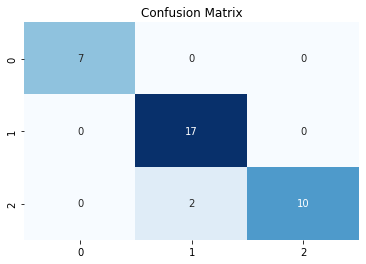

In [ ]:
train_test_result(wine_dt)

# 3.2 Random Forest
* 전체 정확도는 1.0
---
* precision, recall, f1-score값이 1.0으로 완벽하게 맞춤
---
### 즉, Decision Tree의 정확도는 1.0이며, precision, recall, f1-score값이 1.0이다. **즉, 완벽하게 정답을 분류한 Random Forest는 해당 dataset에 좋은 성능을 낸다고 판단.**

### 하지만 1.0이 나온 이유로 데이터의 불균형, 표본데이터의 부족 때문인 것으로 추정된다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



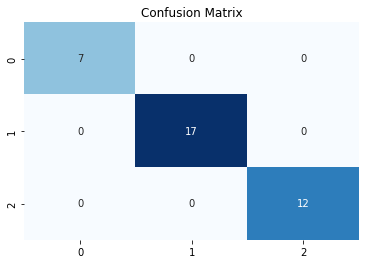

In [ ]:
train_test_result(wine_rf)

# 3.3 SVM
* 전체 정확도는 1.0
---
* precision, recall, f1-score값이 1.0으로 완벽하게 맞춤
---
### 즉, SVM의 정확도는 1.0이며, precision, recall, f1-score값이 1.0이다. **즉, 완벽하게 정답을 분류한 SVM는 해당 dataset에 좋은 성능을 낸다고 판단.**

### 하지만 1.0이 나온 이유로 데이터의 불균형, 표본데이터의 부족 때문인 것으로 추정된다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



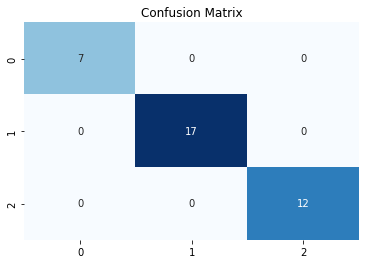

In [ ]:
train_test_result(wine_svm)

# 3.4 SGD Classifier
* 전체 정확도는 0.97
---
* precision의 평균은 0.98이며, 0, 2은 precision이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 예측을 0, 2로 한 대상 중에 예측과 실제 값이 0, 2로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.97이며, 0, 1은 recall이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 실제 값이 0, 1인 대상 중에 예측과 실제 값이 0, 1로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.98이며, 0, 1은 f1-score가 평균값보다 높으므로 좋은 수치를 보임
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 1이 상대적으로 높은 값을 보임
---
### 즉, SGD의 정확도는 0.97이며, f1-score결과로 0, 1이 평균보다 높다고 나왔지만 2의 경우 표본의 부족으로 인한 단순 통계의 오류로 평균보다 0.01감소한 수치이므로 **SGD는 해당 dataset에 전체적으로 좋은 성능을 낸다고 판단.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



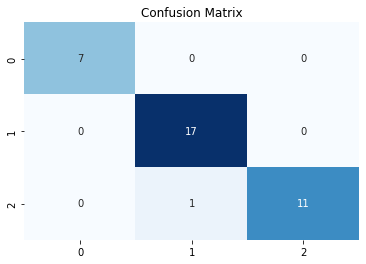

In [ ]:
train_test_result(wine_sgd)

# 3.5 Logistic Regression
* 전체 정확도는 0.97
---
* precision의 평균은 0.98이며, 0, 2은 precision이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 예측을 0, 2로 한 대상 중에 예측과 실제 값이 0, 2로 일치한 데이터의 비율이 평균보다 높음.
---
* recall의 평균은 0.97이며, 0, 1은 recall이 평균값보다 높으므로 좋은 수치를 보임.
* 즉 실제 값이 0, 1인 대상 중에 예측과 실제 값이 0, 1로 일치한 데이터의 비율이 평균보다 높음.
---
* f1-score의 평균은 0.98이며, 0, 1은 f1-score가 평균값보다 높으므로 좋은 수치를 보임
즉 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 0, 1이 상대적으로 높은 값을 보임
---
### 즉, Logistic Regression의 정확도는 0.97이며, f1-score결과로 0, 1이 평균보다 높다고 나왔지만 2의 경우 표본의 부족으로 인한 단순 통계의 오류로 평균보다 0.01감소한 수치이므로 **Logistic Regression는 해당 dataset에 전체적으로 좋은 성능을 낸다고 판단.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



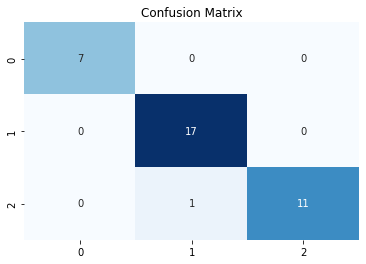

In [ ]:
train_test_result(wine_lr)

# 4. 성능평가 및 결론

# 성능평가
#### 가장 높은 score를 얻은 모델은 다음과 같다.
* accuracy  : (Random Forest, 1.0),&nbsp; (SVM, 1.0)
* precision : (Random Forest, 1.0),&nbsp; (SVM, 1.0)
* recall   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; : (Random Forest, 1.0),&nbsp; (SVM, 1.0)
* f1-score &nbsp; : (Random Forest, 1.0),&nbsp; (SVM, 1.0)

# 결론
#### 와인분류는 피처들을 가지고 와인 클래스가 무엇인지 맞추는 것이 가장 중요하고, 표본 데이터가 클래스별 불균형을 이룬다. 그러므로 **평가 지표로 f1-score**로 선정하며, 해당 모델들 중 가장 높은 score를 달성한 **Random Forest, SVM**을 선정한다.

# 의문점
* validation data를 나누지 않은 채 train과 test만 나누어서 실행했다.
* 표본 데이터의 클래스별 불균형을 이루었지만 전반적으로 학습이 잘되었으며, 특이 Random Forest와 SVM의 경우 평가지표모두 1.0이 나왔다.
* EDA와 Feature Engineering조차 하지 않았는데도 잘 나온것으로 보아 이는 표본 데이터의 절대적인 부족으로 밖에 볼 수 없다.
---

# breast cancer Dataset Classification

주어진 데이터로 환자의 유방암 여부를 분류해본다.

# 1. 데이터 준비
* load_breast_cancer() 함수로 breast_cancer데이터를 불러온다.
* wine data는 178행 13열 형식으로 구성
* target name은 0부터 2까지로 구성됨

In [ ]:
# cancer dataset 불러오기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
print(cancer.data.shape) # 데이터 개수 확인
print(cancer.target.shape) # target 데이터 개수 확인

(569, 30)
(569,)


In [ ]:
cancer.target_names # 데이터 target name 확인

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer.feature_names # 데이터 feature name 확인

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# 각 클래스별 데이터 개수 및 편향(bias)확인
* 현재 0부터 2까지 클래스별 데이터의 개수가 일정하지 않음.
* 데이터셋이 현저하게 작고, 분류자체의 성능이 초점이 아니므로 진행.
* 이후 train_test_split()으로 데이터 추출시 자동으로 랜덤하게 할당

In [ ]:
from collections import defaultdict

cancer_dict = defaultdict(int)
for i in cancer.target:
    cancer_dict[i] += 1 # 키에 대한 값이 없으면 값을 0으로 초기화

cancer_dict

defaultdict(int, {0: 212, 1: 357})

# 2. train, test 데이터셋 분리

In [ ]:
# train, test 데이터 분리
cancer_train_input, cancer_test_input, cancer_train_target, cancer_test_target = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=7)

print(f"train_input shape: {cancer_train_input.shape}")
print(f"train_target shape: {cancer_train_target.shape}")
print(f"test_input shape: {cancer_test_input.shape}")
print(f"test_target shape: {cancer_test_target.shape}")

train_input shape: (455, 30)
train_target shape: (455,)
test_input shape: (114, 30)
test_target shape: (114,)


# 3. 모델 학습 및 예측
# 분류기 지정
* 의사결정트리와 랜덤포레스트는 데이터의 입력값에 robust 하다
* SVM, 로지스틱회귀, 확률적경사하강은 input data의 scale에 robust 하지않다. 표준화를 하고나서 진행
* Pipeline 클래스는 연속된 변환을 순차적으로 처리할 수 있는 기능을 제공하는 유용한 래퍼(Wrapper) 도구

In [ ]:
cancer_dt = DecisionTreeClassifier(random_state=32)                                        # DecisionTree
cancer_rf = RandomForestClassifier(random_state=32)                           # RandomForest
cancer_svm = make_pipeline(StandardScaler(), svm.SVC(random_state=32))           # SVM
cancer_sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=32))  # SGDClassifier
cancer_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=32))           # LogisticRegression

In [ ]:
def train_test_result(classifier):
    classifier.fit(cancer_train_input, cancer_train_target)
    cancer_pred = classifier.predict(cancer_test_input)

    print(classification_report(cancer_test_target, cancer_pred))

    ax = sns.heatmap(confusion_matrix(cancer_test_target, cancer_pred), annot=True, cbar=False, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# 훈련 및 테스트
* 위에서 정의한 train_test_result 함수를 사용
* Digits dataset에 대해 훈련 및 테스트를 수행
* classification report및 confusion matrix 출력

# 평가지표 설정
* 정확도 지표는 비대칭한 데이터 세트에서 Positive/Negative에 대한 예측 정확도를 판단하지 못한 채 Negative/Positive에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 되므로 정확도는 고려하지 않는다.
* 왜냐하면 이 문제는 malignant(악성) 및 benign(양성) 종양에 대한 dataset으로, 정확도 및 정밀도 보다는 Recall의 값이 매우 중요
* 재현율은 malignant(악성)인 데이터 예측을 benign(양성)로 잘못 판단하게 되면 사람의 생명을 앗아가기 때문에 정확도 및 정밀도보다 상대적으로 더 중요한 지표라고 판단.
* 따라서 Recall의 값만 고려하겠음.

# 3.1 Decision Tree
* malignant(악성)에 대한 Recall값 : 0.82
* 7명의 악성 종양 환자에게 양성 종양이라는 잘못된 판단을 함
* benign(양성)에 대한 Recall값 : 0.96
* 3명의 양성 종양 환자에게 악성 종양이라는 잘못된 판단을 함



              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



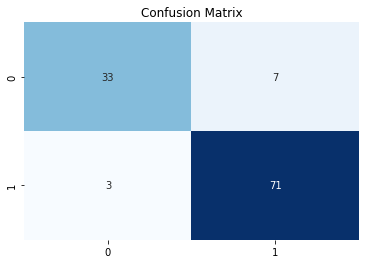

In [ ]:
train_test_result(cancer_dt)

# 3.2 Random Forest
* malignant(악성)에 대한 Recall값 : 1.0
* 모든 악성 종양 환자에게 정확한 진단을 함
* benign(양성)에 대한 Recall값 : 1.0
* 모든 양성 종양 환자에게 정확한 진단을 함

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



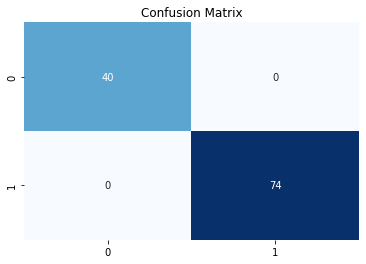

In [ ]:
train_test_result(cancer_rf)

# 3.3 SVM
* malignant(악성)에 대한 Recall값 : 0.95
* 2명의 악성 종양 환자에게 양성 종양이라는 잘못된 판단을 함
* benign(양성)에 대한 Recall값 : 1.0
* 모든 양성 종양 환자에게 정확한 진단을 함

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



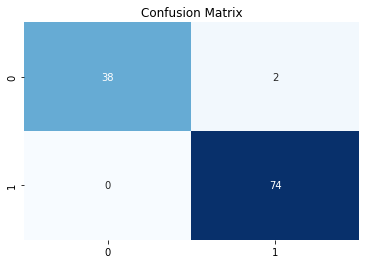

In [ ]:
train_test_result(cancer_svm)

# 3.4 SGD Classifier
* malignant(악성)에 대한 Recall값 : 0.95
* 2명의 악성 종양 환자에게 양성 종양이라는 잘못된 판단을 함
* benign(양성)에 대한 Recall값 : 1.0
* 모든 양성 종양 환자에게 정확한 진단을 함

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



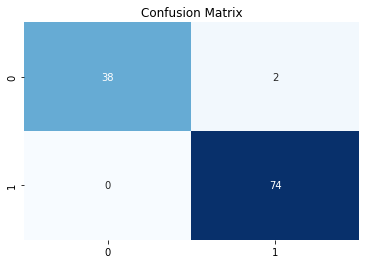

In [ ]:
train_test_result(cancer_sgd)

# 3.5 Logistic Regression
* malignant(악성)에 대한 Recall값 : 0.95
* 2명의 악성 종양 환자에게 양성 종양이라는 잘못된 판단을 함
* benign(양성)에 대한 Recall값 : 1.0
* 모든 양성 종양 환자에게 정확한 진단을 함

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



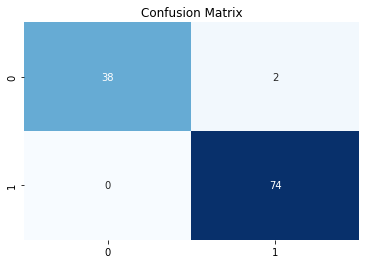

In [ ]:
train_test_result(cancer_lr)

# 4. 성능평가 및 결론

# 성능평가
#### malignant(악성)에 대해 가장 높은 Recall score를 얻은 모델은 다음과 같다.
* recall : (Random Forest, 1.0)

# 결론
#### malignant(악성) 및 benign(양성) 종양분류는 결국 malignant(악성)에 대해 잘 못 판단하면 목숨을 앗아갈 수 있다. 그러므로 malignant(악성)에 대한 Recall를 살피는 것이 가장 중요하다. 그러므로 **평가 지표로 **malignant(악성)에 대한 Recall로 선정하며, 해당 모델들 중 가장 높은 score를 달성한 **Random Forest**을 선정한다.
<br><br>


# 프로젝트 정리

* 여러가지 데이터들에 대하여 5가지의 분류기를 적용하였고, 각각의 성능과 confusion matrix를 이용하여 다양한 측정 지표들을 고려함. 
* EDA나 feature engineering조차 하지 않았는데 성능이 높게 나온 이유는 dataset의 표본자체가 적기 때문인것으로 판단되며, 데이터 불균형이 이룬다 해도 큰 영향이 없었음.
* 대부분의 데이터마이닝 기법(머신러닝) 들은 정규성을 가정한 모델들이 대부분이기에 random forest나 의사결정나무를 제외한 나머지는 정규화를 적용함.
* random forest는 앙상블 방식을 이용하기 때문에 성능이 뛰어나다. 하지만 Random Forest는 속도가 느리고 많은 메모리 차지와 같은 단점이 존재해 상황에 맞는 모델을 고르는 것이 중요하다.
* 또한 데이터의 종류, 타입등을 고려하여 최적의 모델을 선택하고, 최적의 하이퍼파라미터를 찾는 것 또한 중요하다.
* 끝으로 최종 모델의 성능평가시 다양한 지표를 이용해야 하며, 평가지표를 선택시 주어진 데이터의 애해, 주어진 상황등을 면밀하게 파악하여 척도를 적용해야한다.